## Machine Learning Models- Titanic Data Set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the data

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("\nShape of train dataset {}".format(train_df.shape))
print("Shape of test dataset {}".format(test_df.shape))


Shape of train dataset (891, 12)
Shape of test dataset (418, 11)


In [3]:
# data information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# view some data
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
575,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Values

In [6]:
def df_missing(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent_1 = df.isnull().sum()/df.isnull().count()*100
  percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
  missing_df = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
  
  return missing_df

missing_train_df = df_missing(train_df)
missing_train_df.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


### Visualizations

#### Age and Sex:

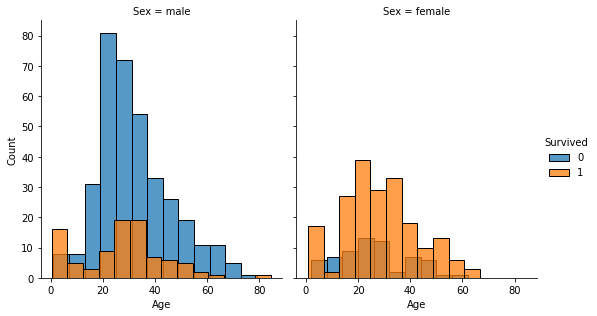

In [7]:
FacetGrid = sns.FacetGrid(train_df, col="Sex", hue="Survived", height=4.5, aspect=.85)
FacetGrid.map_dataframe(sns.histplot, x="Age", binwidth=6)
FacetGrid.set_axis_labels("Age")
FacetGrid.add_legend();

#### Embarked, Pclass and Sex:

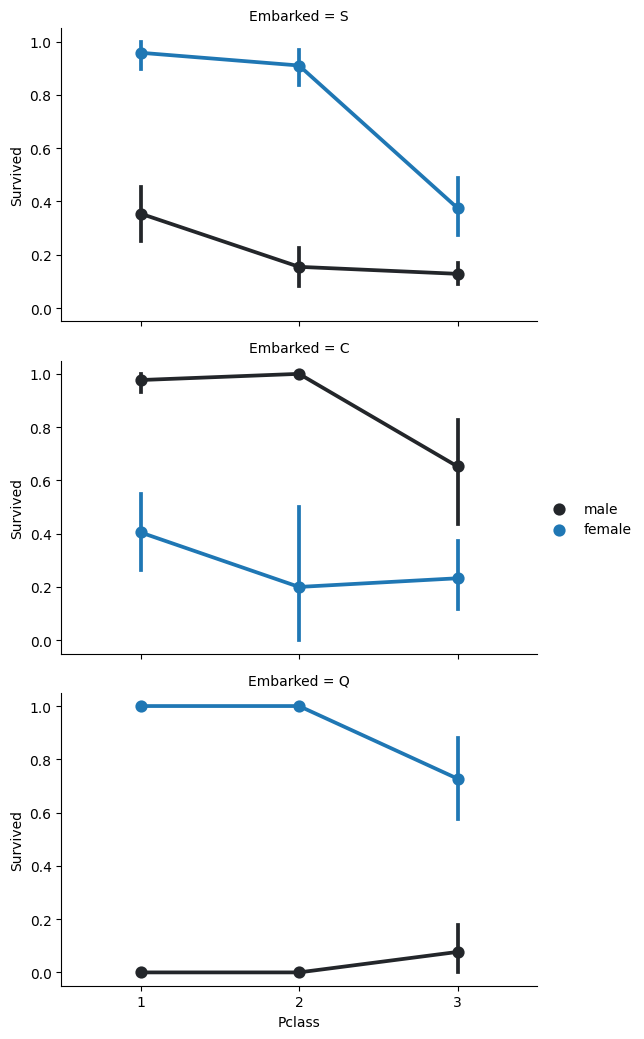

In [8]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=3.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend();

#### Pclass

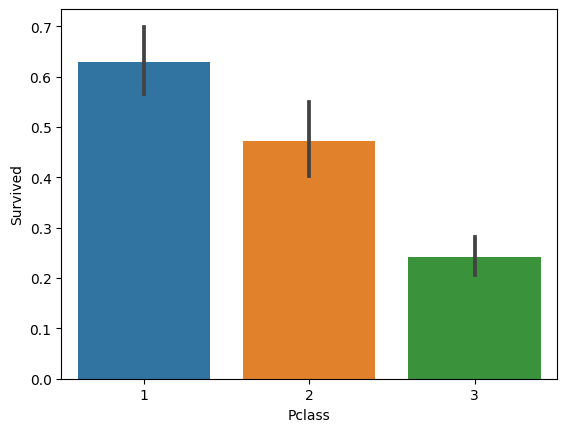

In [9]:
sns.barplot(x='Pclass', y='Survived', data=train_df);

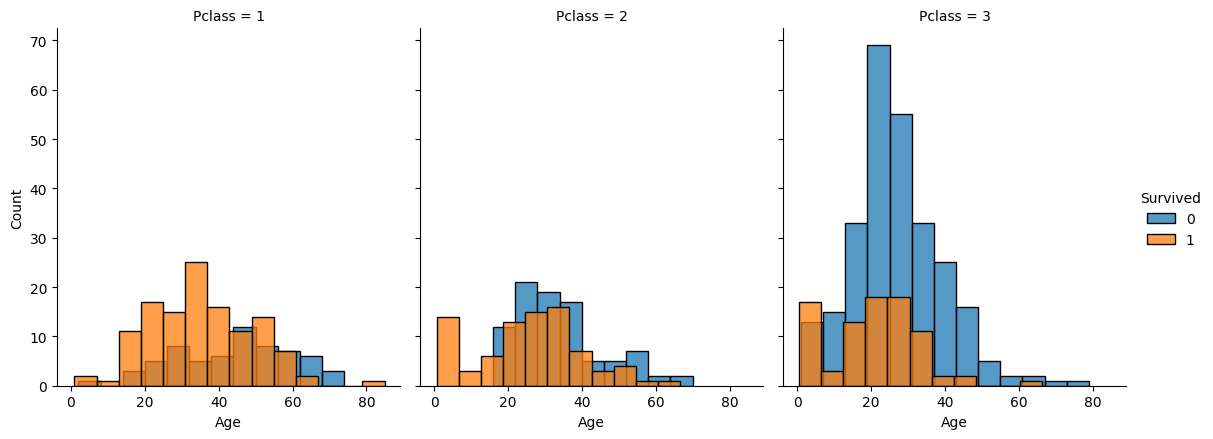

In [10]:
FacetGrid = sns.FacetGrid(train_df, col="Pclass", hue="Survived", height=4.5, aspect=.85)
FacetGrid.map_dataframe(sns.histplot, x="Age", binwidth=6)
FacetGrid.set_axis_labels("Age")
FacetGrid.add_legend();

### Feature Creations

In [11]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

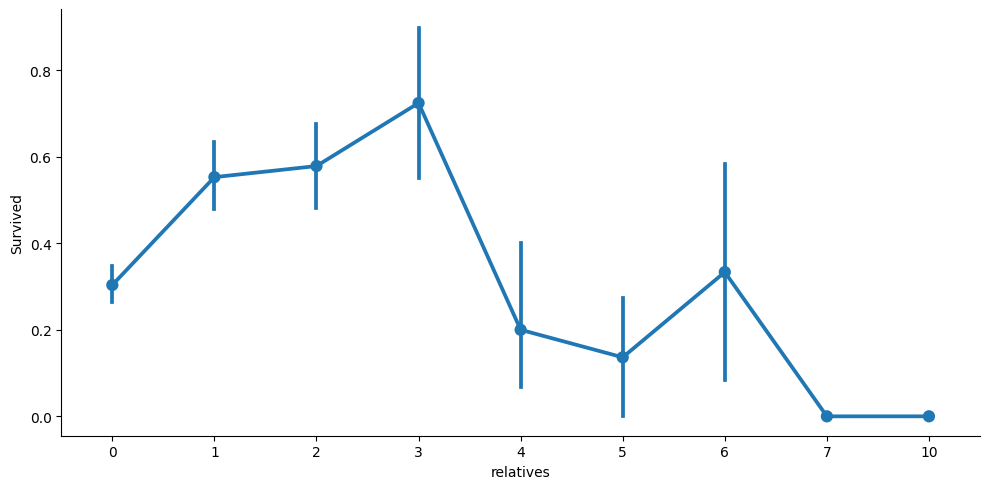

In [12]:
sns.catplot(x='relatives',y='Survived', data=train_df, kind="point", aspect = 2);

### Data Preprocessing

In [13]:
# dropping PassengerId
train_df = train_df.drop(['PassengerId'], axis=1)

#### Cabin

In [14]:
import re

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 0, "T": 0}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    #dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

# dropping the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

#### Age

Age missing values are imputed with random numbers taken from the age distribution

In [15]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    n_null = dataset["Age"].isnull().sum()

    # compute random numbers between the mean, std and n_null
    rand_age = np.random.randint(mean - std, mean + std, size = n_null)

    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    
train_df["Age"].isnull().sum()

0

#### Embarked

In [16]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

#### Name

Using the Name feature to extract the Titles

In [18]:
train_df['Name'].isna().sum()

0

In [19]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

#### Sex

Converting into numeric feature

In [20]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(genders)

#### Ticket

In [21]:
train_df['Ticket'].nunique()

681

In [22]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

#### Embarked

Converting into numeric feature

In [23]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### Creating Categories

#### Age Categoties

In [24]:
data = [train_df, test_df]

for dataset in data:
  # convert into integer
  dataset['Age'] = dataset['Age'].astype(int)

  # assigning categories
  dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
  dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
  dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
  dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
  dataset.loc[dataset['Age'] > 66, 'Age'] = 6

In [25]:
# distribution of age category
train_df['Age'].value_counts()

4    169
6    162
5    150
3    133
2    119
1     90
0     68
Name: Age, dtype: int64

#### Fare

<AxesSubplot:xlabel='Fare', ylabel='Count'>

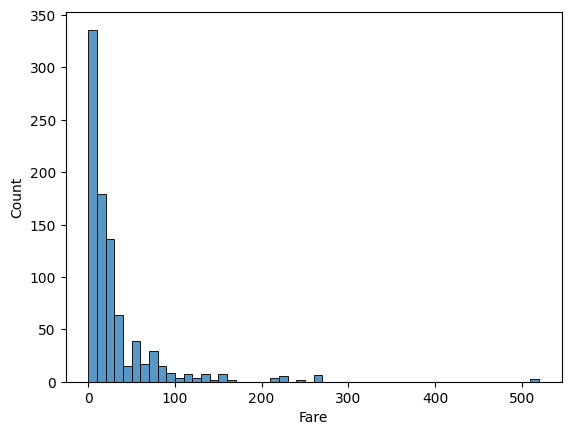

In [26]:
sns.histplot(data=train_df, x="Fare", binwidth=10)

In [27]:
test_df['Fare'].isna().sum()

1

In [28]:
mean_fare = test_df['Fare'].mean()
test_df['Fare'] = test_df['Fare'].fillna(mean_fare)

In [29]:
data = [train_df, test_df]

for dataset in data:
  dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
  dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] = 3
  dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare'] = 4
  dataset.loc[dataset['Fare'] > 250, 'Fare'] = 5
  
  dataset['Fare'] = dataset['Fare'].astype(int)

### Creating new Features

#### Age times Class

In [30]:
data = [train_df, test_df]
for dataset in data:  dataset['Age_Class']= dataset['Age']* dataset['Pclass']

#### Fare per Person

In [31]:
for dataset in data:
  dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
  dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

-----

In [32]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,0,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,1,0,0,1,0,2,9,1
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,0,1,15,1


### Building Machine Learning Models

In [33]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

#### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

acc_log = logreg.score(X_train, Y_train)
print(acc_log)

0.8170594837261503


#### Stochastic Gradient Descent (SGD)

In [35]:
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)

acc_sgd = sgd.score(X_train, Y_train)
print(acc_sgd)

0.4298540965207632


#### Linear Support Vector Machine

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(max_iter=10000)
linear_svc.fit(X_train, Y_train)

acc_linear_svc = linear_svc.score(X_train, Y_train)
print(acc_linear_svc)

0.8148148148148148


#### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

acc_decision_tree = decision_tree.score(X_train, Y_train)
print(acc_decision_tree)

0.9270482603815937


#### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

acc_random_forest = random_forest.score(X_train, Y_train)
print(acc_random_forest)

0.9270482603815937


### K-Fold Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.82022472 0.75280899 0.82022472 0.85393258 0.83146067
 0.83146067 0.79775281 0.88764045 0.87640449]
Mean: 0.8271910112359551
Standard Deviation: 0.03750116776366344


### Feature Importance



In [41]:
importances = pd.DataFrame({'feature': X_train.columns,
                            'importance': np.round(random_forest.feature_importances_, 3)})

importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.199
Sex,0.174
Age_Class,0.093
Age,0.083
Deck,0.083
Pclass,0.075
Fare,0.068
relatives,0.059
Embarked,0.049


### Hyperparameter Tuning

Manual Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {"criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70],
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35],
              "n_estimators": [100, 400, 700, 1000, 1500]}

rf = RandomForestClassifier(n_estimators=100,
                            max_features='auto',
                            oob_score=True,
                            random_state=1)

clf = GridSearchCV(estimator=rf,
                   param_grid=param_grid)

clf.fit(X_train, Y_train)

clf.best_estimator_

In [42]:
# Random Forest with best parameters
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 2,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1)

random_forest.fit(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.72 %


### Evaluations

#### Confusion Matrix

In [43]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[488,  61],
       [ 95, 247]], dtype=int64)

#### Precision and Recall

In [44]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.801948051948052
Recall: 0.7222222222222222
